✅ Sample dataset created successfully!
   gender     country  age  study_hours  attendance final_grade
0    Male  Bangladesh   19         9.82       75.11        Pass
1  Female       Nepal   18         2.58       69.64        Pass
2    Male  Bangladesh   16         1.15       68.20        Fail
3    Male    Pakistan   19         7.87       70.06        Fail
4    Male       Nepal   21         8.26       70.99        Pass

✅ Model Accuracy: 57.50%

Classification Report:
               precision    recall  f1-score   support

           0       0.17      0.08      0.11        13
           1       0.65      0.81      0.72        27

    accuracy                           0.57        40
   macro avg       0.41      0.45      0.41        40
weighted avg       0.49      0.57      0.52        40



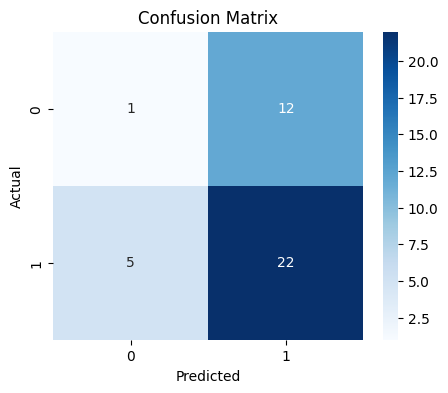

In [4]:
# =============================
# ✅ TaleemAI — Self-Running Notebook (No Upload Needed)
# This code is ready to execute in a Python environment or a single Jupyter cell.
# =============================

# 1️⃣ Install dependencies (uncomment if running in an environment without them)
# !pip install pandas numpy scikit-learn matplotlib seaborn --quiet

# 2️⃣ Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# 3️⃣ Create a balanced sample dataset
np.random.seed(42)
num_samples = 200

data = {
    'gender': np.random.choice(['Male', 'Female'], num_samples),
    'country': np.random.choice(['Pakistan', 'India', 'Bangladesh', 'Nepal'], num_samples),
    'age': np.random.randint(16, 22, num_samples),
    'study_hours': np.random.uniform(1, 10, num_samples).round(2),
    'attendance': np.random.uniform(60, 100, num_samples).round(2),
    'final_grade': np.random.choice(['Pass', 'Fail'], num_samples, p=[0.7, 0.3])
}

df = pd.DataFrame(data)
print("✅ Sample dataset created successfully!")
print(df.head())

# 4️⃣ Encode categorical columns
le = LabelEncoder()
df['gender'] = le.fit_transform(df['gender'])
df['country'] = le.fit_transform(df['country'])
df['final_grade'] = le.fit_transform(df['final_grade']) # 'Pass' will be 1, 'Fail' will be 0 (or vice-versa depending on lexical order)

# 5️⃣ Split data
X = df.drop('final_grade', axis=1)
y = df['final_grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# 6️⃣ Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 7️⃣ Evaluate
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print(f"\n✅ Model Accuracy: {acc*100:.2f}%\n")
print("Classification Report:\n", classification_report(y_test, y_pred))

# 8️⃣ Visualize Confusion Matrix
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()